# Load and prepare the data

Below, we've written the code to load and prepare the data



In [16]:
import pandas as pd

df = pd.read_csv (r"C:\Users\Vere\Desktop\DBA\analiza phd/satis_data.csv", encoding='utf-8')
print(df)

     satisfaction in RM  Check up appointment  Time waiting  Admin procedures  \
0                   1.0                   1.0           1.0               1.0   
1                   2.0                   2.0           1.0               2.0   
2                   2.0                   1.0           1.0               2.0   
3                   2.0                   2.0           4.0               1.0   
4                   3.0                   4.0           1.0               1.0   
..                  ...                   ...           ...               ...   
448                 2.0                   3.0           3.0               3.0   
449                 2.0                   4.0           2.0               1.0   
450                 2.0                   1.0           1.0               1.0   
451                 3.0                   1.0           3.0               3.0   
452                 2.0                   1.0           4.0               4.0   

     Hygiene and cleaning  

# Correlation


The correlations between overall patient satisfaction and availability of 
quality of services, is with inverse (negative) relationship, while
one of the variables grows, the other decreases. There is a weak association between 
the two variables, whereas the p values is significant of p = 0

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
satisfaction in RM,1.000000,-0.032594,-0.047827,-0.074463,-0.070248,-0.044701,0.115617,0.024053,0.010525,0.113645,-0.099702,-0.046373,0.002698,0.006446,-0.066484,-0.054316,-0.048886
Check up appointment,-0.032594,1.000000,0.559921,0.494372,0.510370,0.568945,0.452627,0.466342,0.486994,0.384079,0.448755,0.434380,0.384834,0.392200,0.431153,0.454053,0.387897
Time waiting,-0.047827,0.559921,1.000000,0.566640,0.508728,0.588178,0.469498,0.487826,0.530916,0.499162,0.488808,0.463098,0.403957,0.411212,0.453627,0.448258,0.397621
Admin procedures,-0.074463,0.494372,0.566640,1.000000,0.570927,0.610504,0.416848,0.369542,0.485184,0.344465,0.496006,0.517014,0.419742,0.396416,0.505640,0.498622,0.500503
Hygiene and cleaning,-0.070248,0.510370,0.508728,0.570927,1.000000,0.588487,0.384855,0.414043,0.432013,0.373929,0.520488,0.529652,0.396897,0.416010,0.566930,0.597321,0.514276
Time of appointment,-0.044701,0.568945,0.588178,0.610504,0.588487,1.000000,0.439736,0.451289,0.533650,0.393196,0.462403,0.549793,0.458130,0.413986,0.498922,0.437764,0.473728
Quality/experience dr.,0.115617,0.452627,0.469498,0.416848,0.384855,0.439736,1.000000,0.613619,0.606824,0.649697,0.358550,0.413782,0.426577,0.363007,0.351307,0.352929,0.340058
Specialists avaliable,0.024053,0.466342,0.487826,0.369542,0.414043,0.451289,0.613619,1.000000,0.619515,0.599936,0.464179,0.448126,0.407101,0.395099,0.441362,0.470133,0.454855
Communication with dr,0.010525,0.486994,0.530916,0.485184,0.432013,0.533650,0.606824,0.619515,1.000000,0.660988,0.465800,0.607727,0.446465,0.409654,0.448774,0.418250,0.435717
Exact diagnosis,0.113645,0.384079,0.499162,0.344465,0.373929,0.393196,0.649697,0.599936,0.660988,1.000000,0.417595,0.473764,0.479020,0.428672,0.417481,0.404425,0.377739


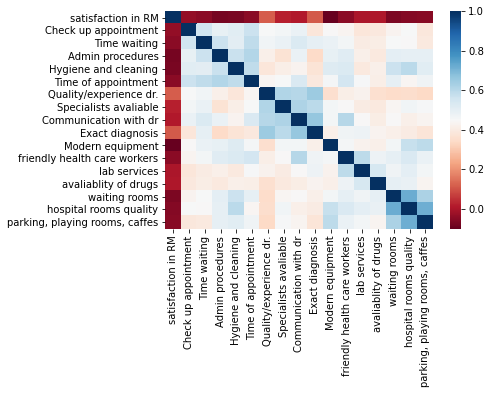

In [17]:
# calculate the correlation matrix
corr = df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

# Multivariate analysis...

In [21]:
df.head()

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
3,2.0,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,1.0
4,3.0,4.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0,1.0


In [5]:
import pandas as pd

df = pd.read_csv (r"C:\Users\Vere\Desktop\DBA\analiza phd/satis_data.csv", encoding='utf-8')
df.head()


,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
3,2.0,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,1.0
4,3.0,4.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0,1.0


In [23]:
# get the summary
df = df.describe()

# add the standard deviation metric
df.loc['+3_std'] = df.loc['mean'] + (df.loc['std'] * 3)
df.loc['-3_std'] = df.loc['mean'] - (df.loc['std'] * 3)

# display it
df

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,2.435841,2.626106,2.517699,2.595133,2.772124,2.575221,2.924779,2.674779,2.814159,2.829646,2.506637,2.829646,2.756637,2.745575,2.668142,2.714602,2.743363
std,0.526755,1.464897,1.407029,1.370346,1.264849,1.442499,1.522516,1.412011,1.443995,1.502314,1.300674,1.401522,1.470501,1.385498,1.242468,1.222646,1.157478
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.250000,3.000000,3.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
+3_std,4.016106,7.020798,6.738786,6.706170,6.566670,6.902719,7.492326,6.910812,7.146143,7.336587,6.408658,7.034211,7.168140,6.902068,6.395547,6.382541,6.215798
-3_std,0.855575,-1.768586,-1.703388,-1.515905,-1.022422,-1.752276,-1.642769,-1.561254,-1.517825,-1.677295,-1.395384,-1.374919,-1.654865,-1.410917,-1.059264,-0.953337,-0.729072


In [14]:
y=df.iloc[:,:1].values

In [12]:
x=df.iloc[:,1:].values

In [10]:
x

array([[1., 1., 1., ..., 1., 1., 1.],
       [2., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 3., 3., ..., 3., 3., 3.],
       [1., 4., 4., ..., 5., 5., 5.]])

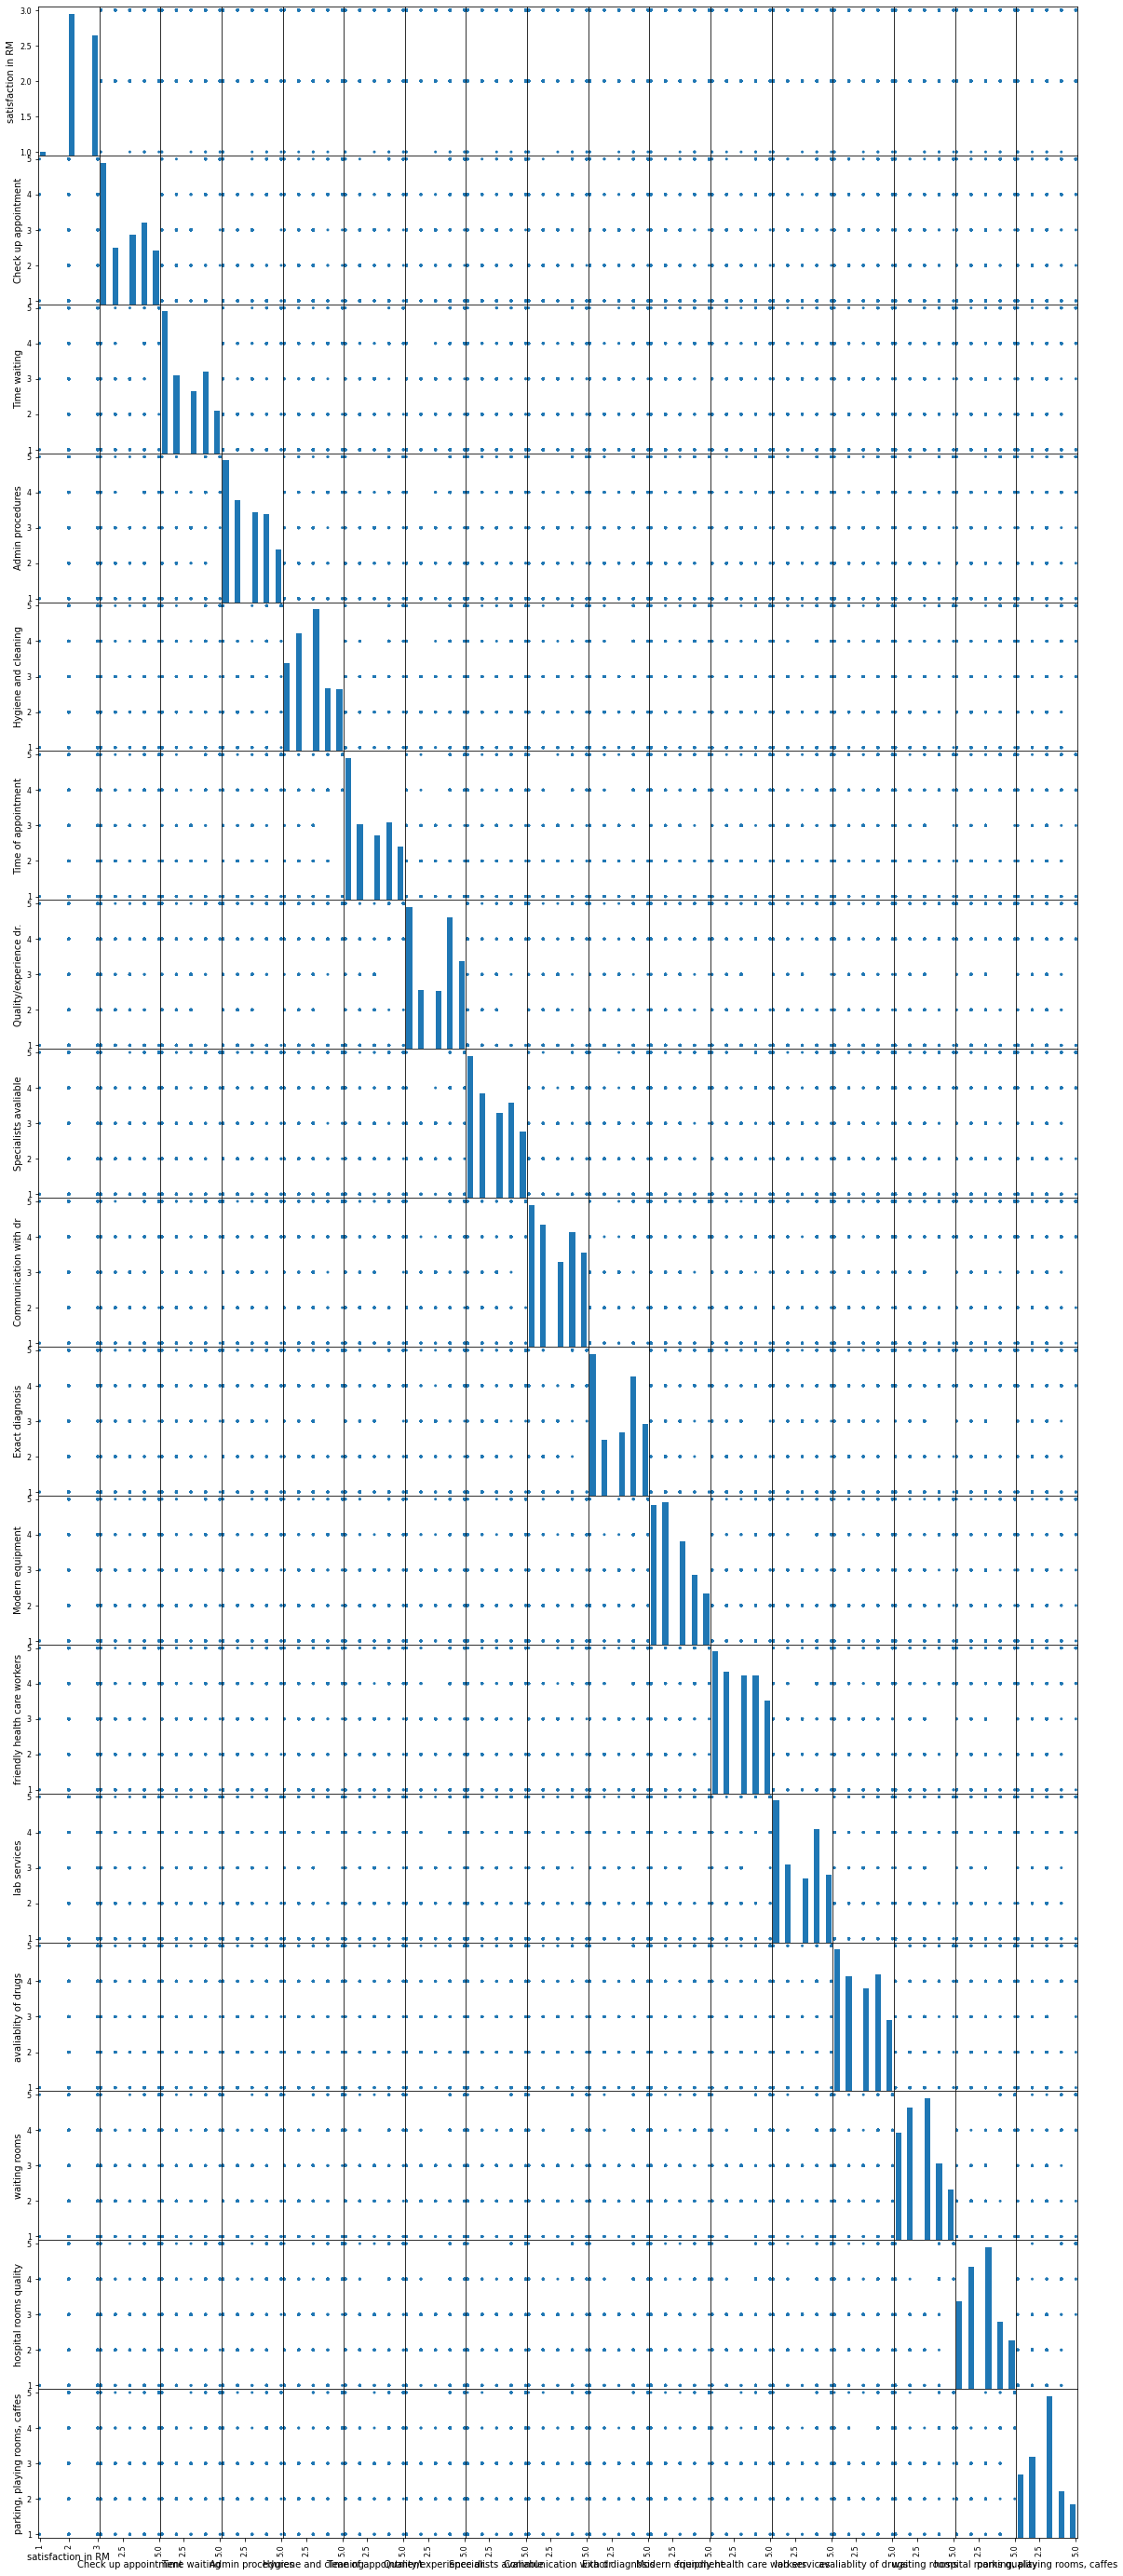

In [20]:
# define the plot
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (20, 50))

# show the plot
plt.show()